In [1]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

plt.style.use('dark_background')

# Dataset que vamos a utilizar es el de los Vinos

In [66]:
dataset=pd.read_csv('https://raw.githubusercontent.com/ThoMiranda/IA-2023/dataset/wine.csv')
dataset_cop=dataset.copy() #realizamos una copia del dataset original

Busco el Target y busco encodearlo

In [64]:
dataset['type'].unique()

array(['red', 'white'], dtype=object)

In [71]:
le=LabelEncoder()
dataset['type']=le.fit_transform(dataset['type'])
dataset_cop.drop('type',axis=1,inplace=True)

In [74]:
print(dataset['type'].unique())
dataset.head()

[0 1]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [81]:
print(max(dataset['fixed acidity']),
min(dataset['fixed acidity']))

15.9 3.8


In [79]:
scalar = MinMaxScaler()
dataset_cop=scalar.fit_transform(dataset_cop)
print(dataset_cop)

[[0.29752066 0.41333333 0.         ... 0.19101124 0.20289855 0.33333333]
 [0.33057851 0.53333333 0.         ... 0.25842697 0.26086957 0.33333333]
 [0.33057851 0.45333333 0.02409639 ... 0.24157303 0.26086957 0.33333333]
 ...
 [0.2231405  0.10666667 0.11445783 ... 0.13483146 0.20289855 0.5       ]
 [0.14049587 0.14       0.18072289 ... 0.08988764 0.69565217 0.66666667]
 [0.18181818 0.08666667 0.22891566 ... 0.05617978 0.55072464 0.5       ]]


In [84]:
dataset_cop.shape

(6497, 12)

# Modelo 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(dataset_cop, dataset['type'], test_size=0.2, random_state=8)

In [92]:
model = tf.keras.models.Sequential([
    # Densa de 128 neuronas 
    tf.keras.layers.Dense(64, activation='relu', input_shape=(12,)), #cada de entrada de 12 neuronas con una
    # Densa de 64 neuronas
    tf.keras.layers.Dense(16, activation='relu'),
    # 3 Clases
    tf.keras.layers.Dense(2, activation='softmax') 
])

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                832       
                                                                 
 dense_11 (Dense)            (None, 16)                1040      
                                                                 
 dense_12 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1906 (7.45 KB)
Trainable params: 1906 (7.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [88]:
history = model.fit(X_train, y_train,epochs = 30, 
                    validation_data = (X_test, y_test), 
                    )

Epoch 1/30
163/163 [==============================] - 0s 976us/step - loss: 0.3380 - accuracy: 0.8578 - val_loss: 0.1231 - val_accuracy: 0.9738
Epoch 2/30
163/163 [==============================] - 0s 876us/step - loss: 0.0760 - accuracy: 0.9827 - val_loss: 0.0617 - val_accuracy: 0.9800
Epoch 3/30
163/163 [==============================] - 0s 633us/step - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.0523 - val_accuracy: 0.9823
Epoch 4/30
163/163 [==============================] - 0s 618us/step - loss: 0.0489 - accuracy: 0.9869 - val_loss: 0.0535 - val_accuracy: 0.9854
Epoch 5/30
163/163 [==============================] - 0s 623us/step - loss: 0.0440 - accuracy: 0.9886 - val_loss: 0.0385 - val_accuracy: 0.9877
Epoch 6/30
163/163 [==============================] - 0s 609us/step - loss: 0.0407 - accuracy: 0.9902 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 7/30
163/163 [==============================] - 0s 614us/step - loss: 0.0379 - accuracy: 0.9910 - val_loss: 0.0336 - val_accuracy:

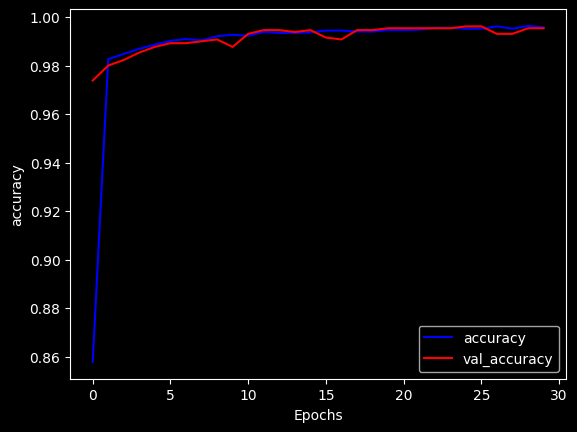

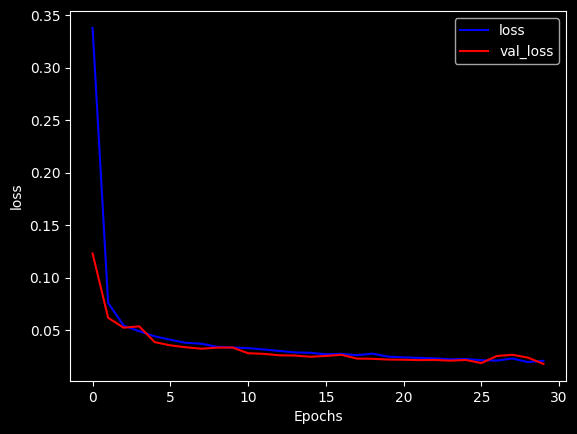

In [89]:
# Función para graficar
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Graficar curvas de loss y accuracy para datos de entrenamiento y validación
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [58]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

41/41 - 0s - loss: 0.0295 - accuracy: 0.9915 - 54ms/epoch - 1ms/step

Test accuracy: 0.9915384650230408


In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular los valores de precisión, recall y f1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=True)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

41/41 [==============================] - 0s 396us/step
Precision: 0.99
Recall: 0.99
F1 score: 0.99


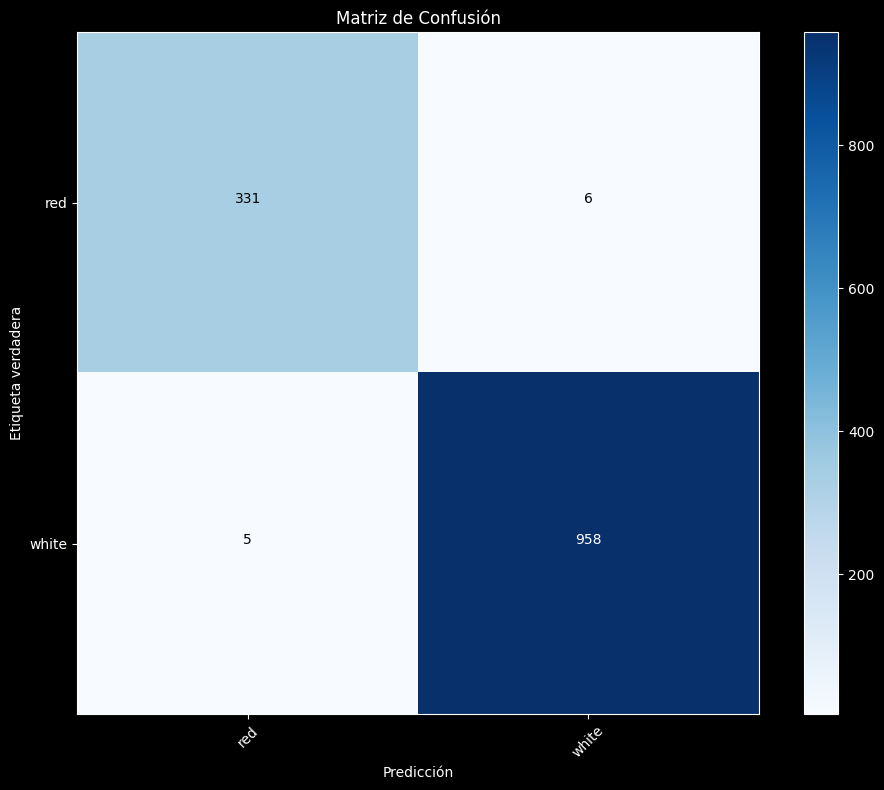

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
classes=['red', 'white']
# Obtener los índices de la clase con mayor probabilidad de cada muestra

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


In [82]:
df_impagos=pd.read_csv('/kaggle/input/credit-risk-customers/credit_customers.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/credit-risk-customers/credit_customers.csv'